In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# --- 1. Load datasets ---
df_cleaned_data = pd.read_csv("merged_cleandata.csv")
df_patient_data = pd.read_csv("demographic_cleandata.csv")

# --- 2. Convert time to datetime ---
df_cleaned_data["time"] = pd.to_datetime(df_cleaned_data["time"])

# --- 3. Merge on patient ID ---
merged_data = df_cleaned_data.merge(
    df_patient_data,
    left_on="patient_id",
    right_on="patient_id",
    how="inner"
)

# --- 4. Set MultiIndex with (patient_id, time) ---
merged_data = merged_data.set_index(["patient_id", "time"]).sort_index()


print(merged_data.index.names)   # should show ['patient_id', 'time']
type(merged_data)

['patient_id', 'time']


pandas.core.frame.DataFrame

In [27]:
merged_data.head()

glucose  calories  heart_rate  steps  \
patient_id time                                                        
HUPA0001P  2018-06-13 18:40:00    332.0     6.360      82.323   34.0   
           2018-06-13 18:45:00    326.0     7.728      83.740    0.0   
           2018-06-13 18:50:00    330.0     4.750      80.525    0.0   
           2018-06-13 18:55:00    324.0     6.359      89.129   20.0   
           2018-06-13 19:00:00    306.0     5.152      92.496    0.0   

                                basal_rate  bolus_volume_delivered  \
patient_id time                                                      
HUPA0001P  2018-06-13 18:40:00    0.091667                     0.0   
           2018-06-13 18:45:00    0.091667                     0.0   
           2018-06-13 18:50:00    0.091667                     0.0   
           2018-06-13 18:55:00    0.091667                     0.0   
           2018-06-13 19:00:00    0.075000                     0.0   

                                carb_input glucose_range_level  \
patient_id time                                                  
HUPA0001P  2018-06-13 18:40:00         0.0         Above Range   
           2018-06-13 18:45:00         0.0         Above Range   
           2018-06-13 18:50:00         0.0         Above Range   
           2018-06-13 18:55:00         0.0         Above Range   
           2018-06-13 19:00:00         0.0         Above Range   

                               calories_categories HR_Category  age gender  \
patient_id time                                                              
HUPA0001P  2018-06-13 18:40:00      Light Activity      Normal   34   Male   
           2018-06-13 18:45:00      Light Activity      Normal   34   Male   
           2018-06-13 18:50:00             Resting      Normal   34   Male   
           2018-06-13 18:55:00      Light Activity      Normal   34   Male   
           2018-06-13 19:00:00      Light Activity      Normal   34   Male   

                                 race  sleep_duration  sleep_quality  \
patient_id time                                                        
HUPA0001P  2018-06-13 18:40:00  Other             6.3            4.5   
           2018-06-13 18:45:00  Other             6.3            4.5   
           2018-06-13 18:50:00  Other             6.3            4.5   
           2018-06-13 18:55:00  Other             6.3            4.5   
           2018-06-13 19:00:00  Other             6.3            4.5   

                                sleep_disturbance_percent  
patient_id time                                            
HUPA0001P  2018-06-13 18:40:00                         80  
           2018-06-13 18:45:00                         80  
           2018-06-13 18:50:00                         80  
           2018-06-13 18:55:00                         80  
           2018-06-13 19:00:00                         80

In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 309392 entries, ('HUPA0001P', Timestamp('2018-06-13 18:40:00')) to ('HUPA0028P', Timestamp('2022-05-18 12:15:00'))
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   glucose                    309392 non-null  float64
 1   calories                   309392 non-null  float64
 2   heart_rate                 309392 non-null  float64
 3   steps                      309392 non-null  float64
 4   basal_rate                 309392 non-null  float64
 5   bolus_volume_delivered     309392 non-null  float64
 6   carb_input                 309392 non-null  float64
 7   glucose_range_level        309392 non-null  object 
 8   calories_categories        309392 non-null  object 
 9   HR_Category                309392 non-null  object 
 10  age                        309392 non-null  int64  
 11  gender                     309392 non-null  object 
 12 

<b> 1. Show the distribution of glucose range across genders </b>

   Gender glucose_range_level   count
0  Female         Above Range   34311
1  Female         Below Range   12141
2  Female            In Range  147237
3    Male         Above Range   32812
4    Male         Below Range    8236
5    Male            In Range   74655


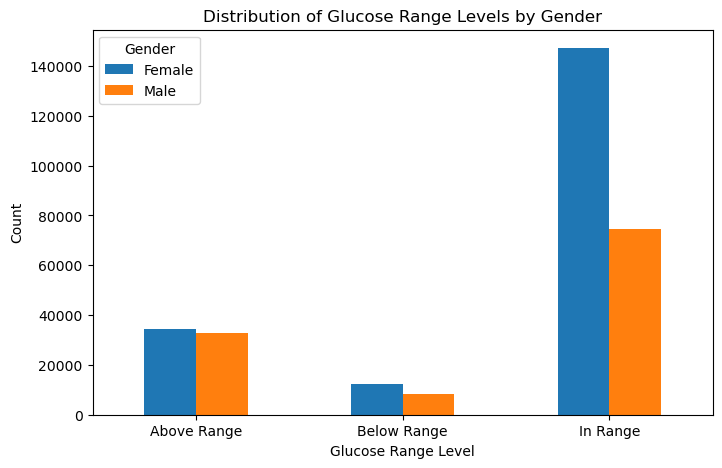

In [89]:
import matplotlib.pyplot as plt

glucose_by_gender = (
    merged_data.groupby(["Gender", "glucose_range_level"])
    .size()
    .reset_index(name="count")
)
print(glucose_by_gender)

# Pivot for visualization
glucose_by_gender_pivot = glucose_by_gender.pivot(
    index="glucose_range_level", columns="Gender", values="count"
)

# Plot as bar chart
glucose_by_gender_pivot.plot(kind="bar", figsize=(8,5))
plt.title("Distribution of Glucose Range Levels by Gender")
plt.xlabel("Glucose Range Level")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


<b> 2. List the top 5 patients that spent maximum time out of range wrto. glucose and heart rate </b>


Top 5 patients with maximum glucose out-of-range counts:
   patient_id  glucose_out_count
23  HUPA0027P              33947
22  HUPA0026P              18866
24  HUPA0028P               2904
13  HUPA0017P               2314
7   HUPA0009P               2232

Top 5 patients with maximum heart rate out-of-range counts:
   patient_id  heart_out_count
23  HUPA0027P            15680
22  HUPA0026P             2141
24  HUPA0028P             1470
12  HUPA0016P             1207
13  HUPA0017P              491

Combined (glucose + heart rate):
  patient_id  glucose_out_count  heart_out_count  total_out
4  HUPA0027P            33947.0          15680.0    49627.0
3  HUPA0026P            18866.0           2141.0    21007.0
5  HUPA0028P             2904.0           1470.0     4374.0
2  HUPA0017P             2314.0            491.0     2805.0
0  HUPA0009P             2232.0              0.0     2232.0


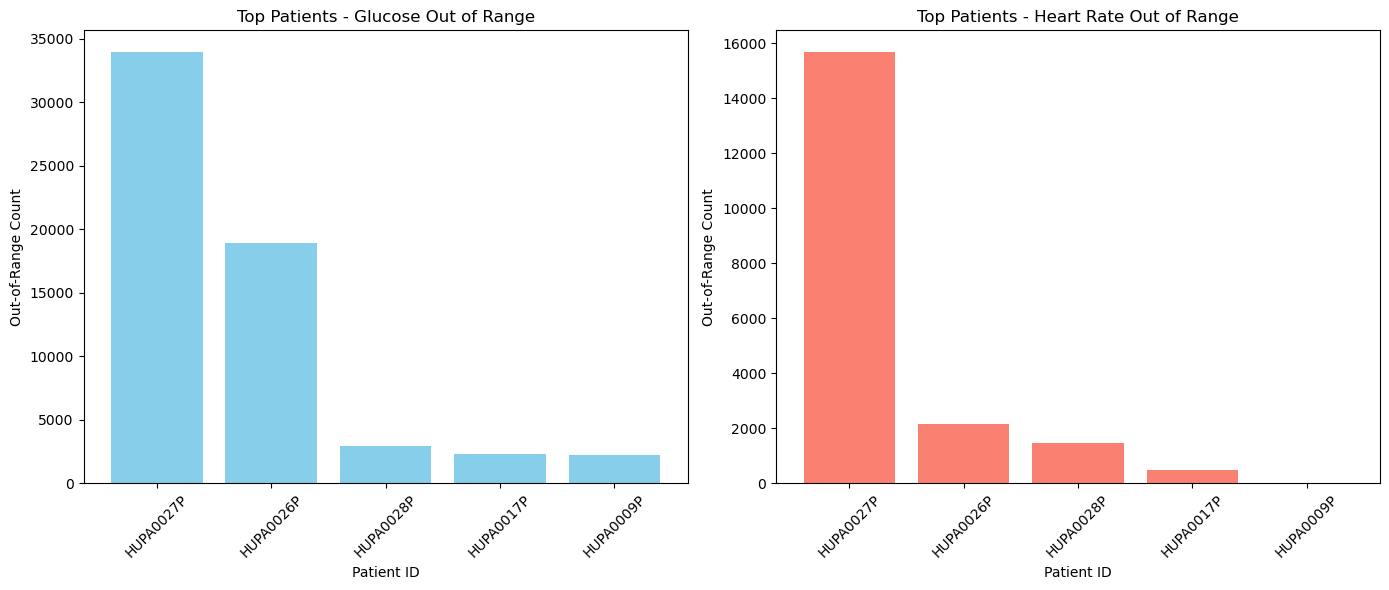

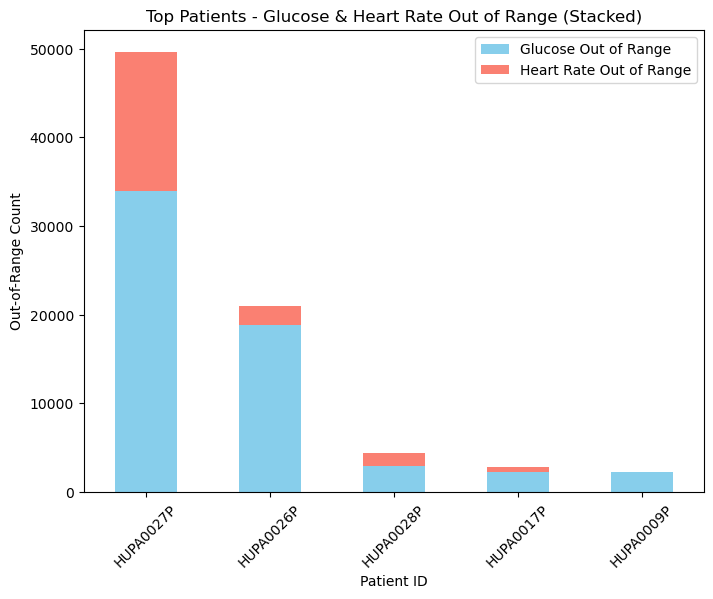

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Glucose Out-of-Range Counts ---
glucose_out = (
    merged_data[merged_data["glucose_range_level"] != "In Range"]
    .groupby("patient_id")
    .size()
    .reset_index(name="glucose_out_count")
    .sort_values(by="glucose_out_count", ascending=False)
    .head(5)
)

# --- 2. Heart Rate Out-of-Range Counts ---
heart_out = (
    merged_data[merged_data["HR_Category"] != "Normal"]
    .groupby("patient_id")
    .size()
    .reset_index(name="heart_out_count")
    .sort_values(by="heart_out_count", ascending=False)
    .head(5)
)

# --- 3. Merge both counts ---
out_summary = pd.merge(glucose_out, heart_out, on="patient_id", how="outer").fillna(0)

# Sort by total out-of-range counts
out_summary["total_out"] = out_summary["glucose_out_count"] + out_summary["heart_out_count"]
out_summary = out_summary.sort_values(by="total_out", ascending=False).head(5)


print("Top 5 patients with maximum glucose out-of-range counts:")
print(glucose_out)

print("\nTop 5 patients with maximum heart rate out-of-range counts:")
print(heart_out)

print("\nCombined (glucose + heart rate):")
print(out_summary)

# --- 4. Plot Side-by-Side Charts ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Glucose bar chart
axes[0].bar(out_summary["patient_id"], out_summary["glucose_out_count"], color="skyblue")
axes[0].set_title("Top Patients - Glucose Out of Range")
axes[0].set_xlabel("Patient ID")
axes[0].set_ylabel("Out-of-Range Count")
axes[0].tick_params(axis="x", rotation=45)

# Heart Rate bar chart
axes[1].bar(out_summary["patient_id"], out_summary["heart_out_count"], color="salmon")
axes[1].set_title("Top Patients - Heart Rate Out of Range")
axes[1].set_xlabel("Patient ID")
axes[1].set_ylabel("Out-of-Range Count")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

# --- 5. Combined Stacked Bar Chart ---
out_summary.set_index("patient_id")[["glucose_out_count", "heart_out_count"]].plot(
    kind="bar", stacked=True, figsize=(8, 6), color=["skyblue", "salmon"]
)

plt.title("Top Patients - Glucose & Heart Rate Out of Range (Stacked)")
plt.xlabel("Patient ID")
plt.ylabel("Out-of-Range Count")
plt.xticks(rotation=45)
plt.legend(["Glucose Out of Range", "Heart Rate Out of Range"])
plt.show()


<b> 3. Is there a significant correlation between blood glucose levels, sleep disturbance, and sleep quality scores? </b>

Correlation (Glucose vs % Sleep Disturbances): 0.28
Correlation (Glucose vs Sleep Quality): 0.05


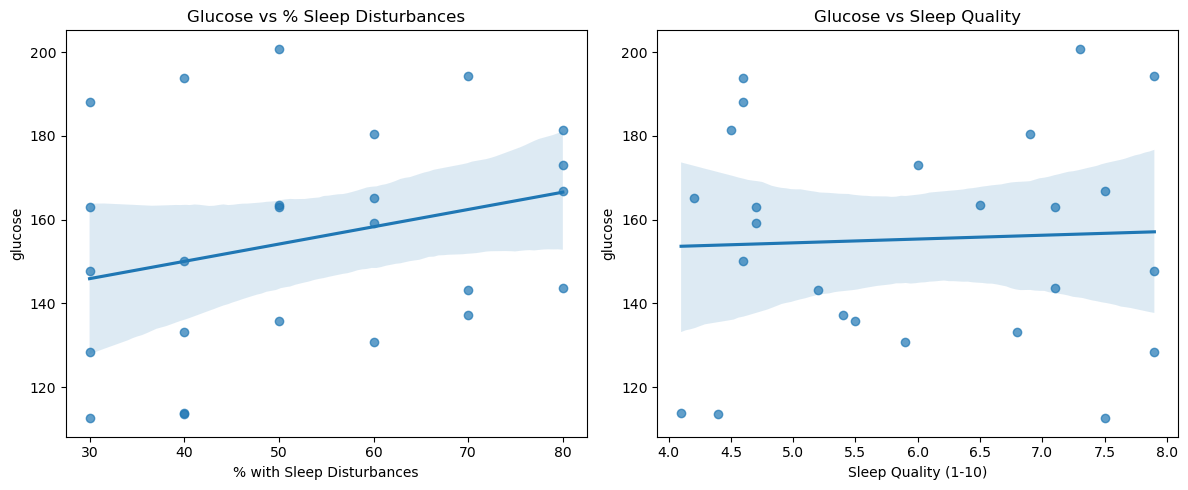

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Average glucose per patient ---
avg_glucose = merged_data.groupby("patient_id")["glucose"].mean().reset_index()

# --- Merge with sleep data ---
glucose_sleep = avg_glucose.merge(
    df_patient_data[["Patient_ID", "% with Sleep Disturbances", "Sleep Quality (1-10)"]],
    left_on="patient_id", right_on="Patient_ID", how="inner"
)

# --- Correlation values ---
corr_disturb = glucose_sleep["glucose"].corr(glucose_sleep["% with Sleep Disturbances"])
corr_quality = glucose_sleep["glucose"].corr(glucose_sleep["Sleep Quality (1-10)"])

print(f"Correlation (Glucose vs % Sleep Disturbances): {corr_disturb:.2f}")
print(f"Correlation (Glucose vs Sleep Quality): {corr_quality:.2f}")

# --- Visualization: scatter plots side by side ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Glucose vs Disturbances
sns.regplot(
    data=glucose_sleep,
    x="% with Sleep Disturbances",
    y="glucose",
    scatter_kws={'alpha':0.7},
    ax=axes[0]
)
axes[0].set_title("Glucose vs % Sleep Disturbances")

# Glucose vs Quality
sns.regplot(
    data=glucose_sleep,
    x="Sleep Quality (1-10)",
    y="glucose",
    scatter_kws={'alpha':0.7},
    ax=axes[1]
)
axes[1].set_title("Glucose vs Sleep Quality")

plt.tight_layout()
plt.show()


<b> 4. How do blood glucose levels differ across racial groups and how strongly are these differences associated with age?  </b>

               Race Age_Group_Label  mean_glucose
0             Asian           19–33        135.89
1             Asian           50–63        166.94
2             Black           19–33        137.33
3             Black           40–50        156.57
4             Black           50–63        129.63
5             Black           63–74        138.16
6          Hispanic           19–33        162.99
7          Hispanic           40–50        113.47
8          Hispanic           63–74        200.80
9   Native American           19–33        143.68
10  Native American           33–40        180.38
11  Native American           40–50        130.77
12  Native American           63–74        173.15
13            Other           19–33        163.52
14            Other           33–40        147.00
15            Other           50–63        159.11
16            Other           63–74        193.74
17            White           19–33        194.28
18            White           33–40        165.20


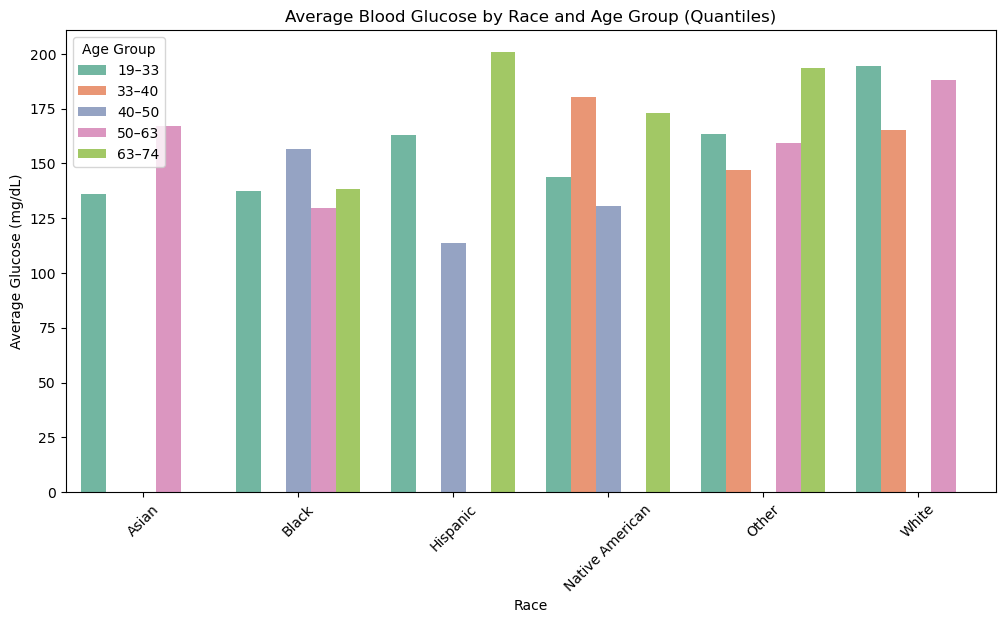

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Compute per-patient average glucose ---
patient_summary = (
    merged_data.groupby(["patient_id", "Race", "Age"])["glucose"]
    .mean()
    .reset_index(name="mean_glucose")
)

# --- Step 2: Create 5 Age Groups using quantiles ---
patient_summary["Age_Group"] = pd.qcut(patient_summary["Age"], q=5)

# --- Step 3: Replace intervals with readable labels (e.g., "20–29") ---
patient_summary["Age_Group_Label"] = patient_summary["Age_Group"].apply(
    lambda x: f"{int(x.left)}–{int(x.right)}"
)

# --- Step 4: Compute average glucose by Race and Age_Group ---
avg_glucose_by_race_age = (
    patient_summary.groupby(["Race", "Age_Group_Label"], observed=True)["mean_glucose"]
    .mean().round(2)
    .reset_index()
)

print(avg_glucose_by_race_age)

# --- Step 5: Grouped bar chart ---
plt.figure(figsize=(12,6))
sns.barplot(
    data=avg_glucose_by_race_age,
    x="Race",
    y="mean_glucose",
    hue="Age_Group_Label",
    palette="Set2"
)
plt.title("Average Blood Glucose by Race and Age Group (Quantiles)")
plt.ylabel("Average Glucose (mg/dL)")
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.show()


<b>5. How does heart rate correlate with blood glucose fluctuations? </b>


Summary of Heart Rate by Glucose Fluctuation Range:

  Fluctuation_Range  mean_heart_rate  patient_count
0             20-40            75.64              1
1             40-60            74.96             10
2             60-80            77.83             12
3            80-100            71.88              2

Correlation between glucose fluctuation and average heart rate: 0.13


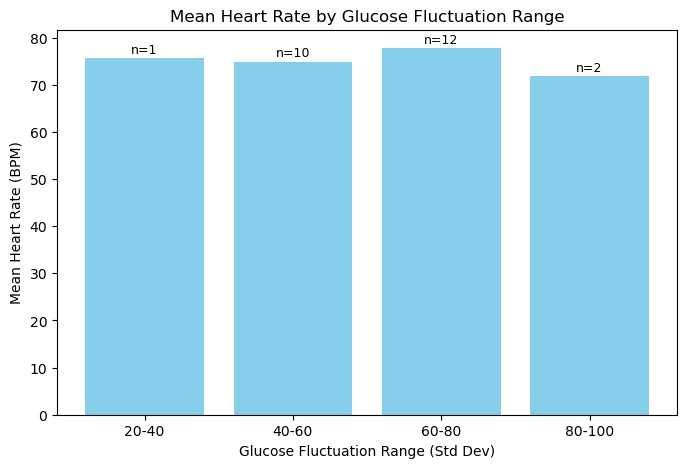

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Aggregate per patient ---
patient_glucose_hr = (
    merged_data.groupby("patient_id")[["glucose", "heart_rate"]]
    .agg(
        glucose_fluctuation=("glucose", "std"),   # std dev = fluctuation
        avg_heart_rate=("heart_rate", "mean")     # avg HR
    )
    .reset_index()
)

# --- Step 2: Create bins dynamically ---
max_fluctuation = patient_glucose_hr["glucose_fluctuation"].max()
bins = list(range(0, int(max_fluctuation) + 20, 20))  # bins of size 20
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

patient_glucose_hr["Fluctuation_Range"] = pd.cut(
    patient_glucose_hr["glucose_fluctuation"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# --- Step 3: Summarize by fluctuation bins ---
summary = (
    patient_glucose_hr.groupby("Fluctuation_Range", observed=True)
    .agg(
        mean_heart_rate=("avg_heart_rate", "mean"),
        patient_count=("avg_heart_rate", "count")
    )
    .round(2)
    .reset_index()
)

# --- Print the summary table ---
print("\nSummary of Heart Rate by Glucose Fluctuation Range:\n")
print(summary)

# --- Step 4: Correlation between glucose fluctuation and avg HR ---
correlation = patient_glucose_hr["glucose_fluctuation"].corr(patient_glucose_hr["avg_heart_rate"])
print(f"\nCorrelation between glucose fluctuation and average heart rate: {correlation:.2f}")

# --- Step 5: Bar chart ---
plt.figure(figsize=(8,5))
plt.bar(summary["Fluctuation_Range"], summary["mean_heart_rate"], color="skyblue")
plt.title("Mean Heart Rate by Glucose Fluctuation Range")
plt.xlabel("Glucose Fluctuation Range (Std Dev)")
plt.ylabel("Mean Heart Rate (BPM)")

# Annotate counts above bars
for idx, row in summary.iterrows():
    plt.text(idx, row["mean_heart_rate"] + 1, f"n={row['patient_count']}", 
             ha="center", fontsize=9, color="black")

plt.show()


<b> 6.How do rolling averages of heart rate vary during periods of high vs. low blood glucose for each patient? </b>

Summary table of 6-hour rolling HR by glucose range level:
glucose_range_level  Above Range  Below Range   In Range
patient_id                                              
HUPA0001P              82.380448    80.192811  79.798253
HUPA0002P              68.696965    64.813075  66.843293
HUPA0003P              77.264411    72.683572  78.919539
HUPA0004P              78.702707    76.517853  78.041567
HUPA0005P              83.425782    84.045728  84.853504
HUPA0006P              65.117654    70.988403  65.184151
HUPA0007P              70.194814    68.138688  70.582550
HUPA0009P              84.144681     0.000000  85.303073
HUPA0010P              79.308084    77.096671  78.176105
HUPA0011P              77.279949    68.800328  72.505179
HUPA0014P              78.300530    91.583678  86.812073
HUPA0015P              70.062684    67.942754  67.562498
HUPA0016P              85.323537    89.078362  92.981049
HUPA0017P              80.547532    87.046255  84.519620
HUPA0018P              75.609

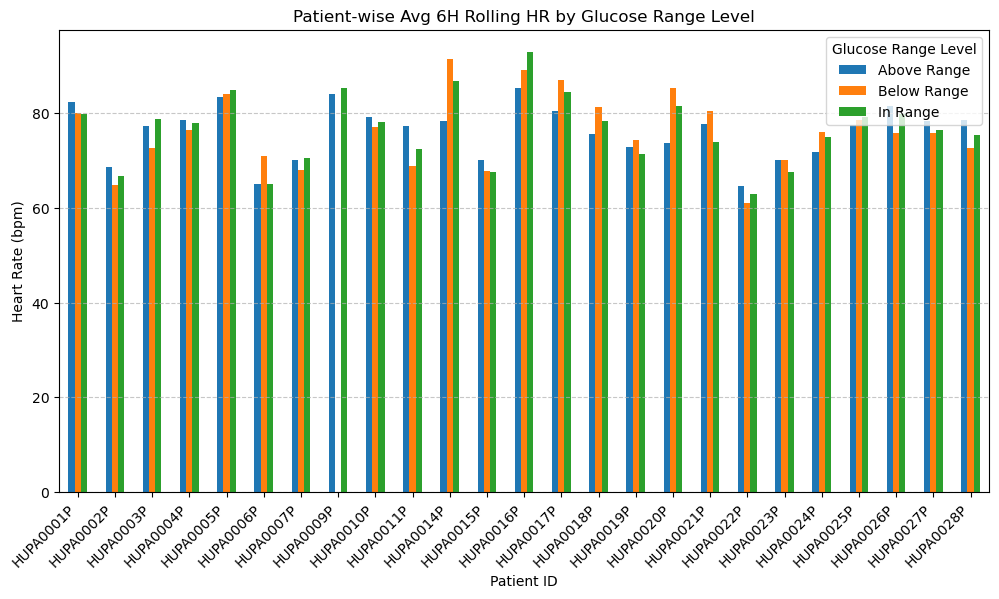

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# Step 1: Load and prepare data
# --------------------------
df = pd.read_csv("merged_cleandata.csv", parse_dates=["time"])
df = df.sort_values(["patient_id", "time"])

# Rolling 6-hour average HR per patient (clean version, no warnings)
df["hr_rolling6h"] = (
    df.groupby("patient_id", group_keys=False)[["time", "heart_rate"]]
      .apply(lambda g: (
          g.set_index("time")["heart_rate"]
           .rolling("6h", min_periods=1)
           .mean()
           .reset_index(drop=True)
      ))
      .reset_index(drop=True)
)

# Summary table for each patient

summary = (
    df.groupby(["patient_id", "glucose_range_level"])["hr_rolling6h"]
      .mean()
      .unstack(fill_value=0)
)
print("Summary table of 6-hour rolling HR by glucose range level:")
print(summary)

#Side-by-side comparison across patients

summary.plot(kind="bar", figsize=(12,6))

plt.title("Patient-wise Avg 6H Rolling HR by Glucose Range Level")
plt.ylabel("Heart Rate (bpm)")
plt.xlabel("Patient ID")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Glucose Range Level")
plt.show()